# Projeto 2 - Ciência dos Dados

### Proposta geral do Projeto 2: Prevendo _targets_ baseando-se em um grupo de _features_. 
### Turma A

**Membros:**
-
+ Alessandra Yumi Carvalho Ogawa
+ André Brito
+ Arthur Cisotto Machado
+ Camila Bernardi Moniz


### Importando as Bibliotecas Necessárias

In [278]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import itertools
import plotly.express as px
import seaborn as sns
import numpy as np
import os
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

## A. Introdução  
    "Detalhar objetivo escolhido para trabalhar neste projeto juntamente com
    descrição da base de dados. Pesquise trabalhos na literatura que discutam o
    tema escolhido. Para trabalhos acadêmicos, acesse
    https://scholar.google.com.br/. Guarde as referências estudadas para citá-las
    no seu projeto."

## B. Minerando Dados e Características do Dataset  
    Se necessário, faça filtro na base de dados tanto de linhas como de colunas
    em prol do objetivo traçado anteriormente. Descreva as variáveis finais que serão utilizadas a partir deste ponto.
    Faça análise descritiva detalhada das variáveis, norteado pelo objetivo do
    problema. Aqui, é interessante entender como sua variável target se
    comporta cruzada com cada feature. Note que ao cruzar duas variáveis, pode obter o cruzamento entre: duas variáveis quantitativas; duas variáveis
    qualitativas; ou uma de cada tipo. Cada cruzamento irá exigir ferramentas
    descritivas distintas. A tabela a seguir apresenta algumas ferramentas descritivas vistas no curso:

In [279]:
d = {'': ['Duas variáveis qualitativas', 'Duas variáveis quantitativas', 'Uma variável de cada'], 'Ferramentas estatísticas': ['Tabela cruzadas (com uso de normalize adequado ao problema); Gráficos de barras (empilhados ou stacked); entre outras', 'Medidas de associação; Gráfico de dispersão; entre outras', 'Medidas-resumo da variável quantitativa segmentando por rótulo da variável qualitativa; Histograma (ou boxplot) da variável quantitativa segmentando por rótulo da variável qualitativa; entre outras']}
df = pd.DataFrame(data=d)
pd.set_option('display.max_colwidth', None)
df.style.hide_index()

,Ferramentas estatísticas
Duas variáveis qualitativas,Tabela cruzadas (com uso de normalize adequado ao problema); Gráficos de barras (empilhados ou stacked); entre outras
Duas variáveis quantitativas,Medidas de associação; Gráfico de dispersão; entre outras
Uma variável de cada,Medidas-resumo da variável quantitativa segmentando por rótulo da variável qualitativa; Histograma (ou boxplot) da variável quantitativa segmentando por rótulo da variável qualitativa; entre outras


    Storytelling com dados: encontre uma representação gráfica que descreva
    bem os seus dados e que também favoreça no storytelling que pretende
    fazer ao explicar sua linha de raciocínio às outras pessoas (seja em formato
    escrito ou em apresentação). 

### Importando o Dataset

In [280]:
data = pd.read_csv('user_fake_authentic_4class.csv')
data.head(10)

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.000,0.107055,334.596802,r
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.000,0.007400,2137.979248,r
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.000,0.221954,96.244957,r
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.000,0.025055,226.622437,r
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.000,0.000000,0.000000,r
5,17,358,298,374,1,0,122,0.000000,0.176,20.510000,1.20,0.824,0.824,0.0,0.000,0.029504,1249.813965,r
6,25,1100,1400,16,1,0,68,0.000000,0.111,9.120000,0.71,0.778,0.667,0.0,0.056,0.013411,1088.083862,r
7,77,259,2800,15,1,0,9,0.500000,0.000,13.730000,0.86,0.833,0.000,0.0,0.000,0.235294,159.321838,r
8,16,157,226,233,1,0,10,0.125000,0.000,24.920000,1.27,0.875,0.000,0.0,0.063,0.000000,1160.965820,r
9,195,717,475,118,1,0,14,0.444444,0.056,9.950000,0.96,0.944,0.111,0.0,0.000,0.191383,847.155212,r


### Legenda do Dataset:  

In [281]:
d1 = {'Nome da Variável': ['pos','flw', 'flg', 'bl', 'pic', 'lin', 'cl','cz','ni','erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi', 'class'], 'Nome da Feature': ['Número de posts', 'Número de seguidores', 'Número contas seguindo', 'Tamanho da Biografia', 'Disponibilidade de Foto', 'Disponibilidade de Link', 'Tamanho médio da Legenda', 'Legenda Zero', 'Porcentagem Sem Imagem', 'Taxa de Engajamento (Like)', 'Taxa de Engajamento (Comentário)', 'Porcentagem de Localização', 'Média de uso de Hashtags', 'Palavras-Chave Promocionais', 'Palavras-Chave Seguidores', 'Similaridade por Cosseno', 'Intervalo de Posts', 'Classe de Usuários'], 'Descrição': ['Número total de posts que o usuário já fez', 'Número de seguidores', 'Número de contas que o usuário segue', 'Número de caracteres da biografia do usuário', 'Valor 0 se o usuário não tem foto de perfil, 1 caso contrário', 'Valor 0 se o usuário não tem Link externo no perfil, 1 caso contrário', 'Número médio de caracteres nas legendas dos posts do usuário', 'Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres', 'Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem (Existem 3 tipos de mídia em um post no Instagram, imagem, vídeo e carrosel)', 'Número de Likes dividido pelo Número de Seguidores', 'Número de Comentários dividiodo pelo Número de Seguidores', 'Porcentagem (0.0 a 1.0) de posts com tag de localização', 'Número médio de hashtags usadas em um post', 'Número médio de palavras-chave promocionais em hashtags (por exemplo, regrann, contest, repost, giveaway, mention, share, give away, quiz, etc)', 'Número médio de palavras-chave procurando seguidores em hashtags (por exemplo, follow, like, folback, follback, f4f, etc)', 'Medida da similaridade de entre dois vetores (posts) num espaço vetorial que avalia o valor do cosseno do ângulo compreendido entre eles.', 'Intervalo de tempo médio entre posts (em horas)', 'Classes 2-class: r (usuários reais/autenticados), f (Usuário fake / Comprou seguidores) | Classes 4-class: r (usuários reais/autenticados), a (Usuário fake Ativo), i (Usuário fake Inativo), s (Usuário fake Spam). Note que as 3 classes de usuário fake (a, i, s) foram determinadas por avaliadores humanos.' ]}
df1 = pd.DataFrame(data=d1)
pd.set_option('display.max_colwidth', None)
df1.style.hide_index()


Nome da Variável,Nome da Feature,Descrição
pos,Número de posts,Número total de posts que o usuário já fez
flw,Número de seguidores,Número de seguidores
flg,Número contas seguindo,Número de contas que o usuário segue
bl,Tamanho da Biografia,Número de caracteres da biografia do usuário
pic,Disponibilidade de Foto,"Valor 0 se o usuário não tem foto de perfil, 1 caso contrário"
lin,Disponibilidade de Link,"Valor 0 se o usuário não tem Link externo no perfil, 1 caso contrário"
cl,Tamanho médio da Legenda,Número médio de caracteres nas legendas dos posts do usuário
cz,Legenda Zero,Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres
ni,Porcentagem Sem Imagem,"Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem (Existem 3 tipos de mídia em um post no Instagram, imagem, vídeo e carrosel)"
erl,Taxa de Engajamento (Like),Número de Likes dividido pelo Número de Seguidores


## Análise Exploratória

### Relação entre features
Primeiramente, verificamos se existem correlações fortes entre features diferentes.  
Se existirem 2 features diferentes fortemente relacionadas podemos descartar alguma delas para facilitar a análise dos dados.

In [282]:
data.corr()


,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
pos,1.000000,0.166695,0.038562,0.141610,0.055275,0.139939,0.191024,-0.063103,0.064128,-0.024753,-0.029045,0.025164,0.011754,0.027358,-0.009527,-0.028462,-0.070077
flw,0.166695,1.000000,0.008143,0.048008,0.013466,0.060522,0.042617,-0.022574,0.024401,-0.006315,-0.007753,0.020658,0.009011,-0.000612,-0.001073,-0.018352,-0.009618
flg,0.038562,0.008143,1.000000,0.031344,-0.117024,0.015255,-0.106933,0.165158,-0.098679,0.033867,-0.005908,-0.093101,-0.038603,-0.076363,0.016669,0.195926,-0.051608
bl,0.141610,0.048008,0.031344,1.000000,0.166773,0.366875,0.295858,-0.212018,0.121772,-0.025033,-0.034935,0.218418,0.165403,-0.017546,0.031489,-0.167572,-0.065453
pic,0.055275,0.013466,-0.117024,0.166773,1.000000,0.091341,0.132968,0.113378,0.145210,-0.015730,-0.016664,0.133094,0.066943,0.033606,0.005830,-0.285706,0.105846
lin,0.139939,0.060522,0.015255,0.366875,0.091341,1.000000,0.239230,-0.141152,0.068616,-0.025193,-0.032901,0.147633,0.087192,-0.019877,0.009055,-0.078826,-0.047884
cl,0.191024,0.042617,-0.106933,0.295858,0.132968,0.239230,1.000000,-0.342882,0.088381,-0.034115,-0.037111,0.061298,0.191118,0.262864,0.071502,-0.158918,-0.075580
cz,-0.063103,-0.022574,0.165158,-0.212018,0.113378,-0.141152,-0.342882,1.000000,-0.094043,0.075819,0.078008,-0.171646,-0.202589,-0.080290,-0.054557,0.270140,0.065315
ni,0.064128,0.024401,-0.098679,0.121772,0.145210,0.068616,0.088381,-0.094043,1.000000,-0.017700,-0.018242,0.210334,0.055417,-0.024935,-0.005014,-0.273763,0.038901
erl,-0.024753,-0.006315,0.033867,-0.025033,-0.015730,-0.025193,-0.034115,0.075819,-0.017700,1.000000,0.440497,-0.009019,0.027886,-0.006053,0.033943,-0.036677,-0.002977


In [283]:
x=data.corr()
lista = x.values.tolist()
fig = px.imshow(lista,  labels=dict(x="Features", y="Features", color="Correlação"),
                x=['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi'],
                y=['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi'],
                zmax = 1, zmin = -1, title = "Correlação entre Features")
fig.show()

#### Achando as maiores e menores correlações:

In [284]:
lista_corrs = list(itertools.chain(*lista))

lista_corrs_sem_1 = list(filter(lambda x: x != 1 and x != -1, lista_corrs))

maximo = max(lista_corrs_sem_1)
minimo = min(lista_corrs_sem_1)

print(f"A maior correlação é {maximo}")
print(f"A menor correlação é {minimo}")

A maior correlação é 0.44049679787453194
A menor correlação é -0.3428821083645762


#### Como pode-se observar na célula de cima as maiores e menores correlações não são suficiente significativas a ponto de se destacarem de certo modo. Por isso, conclui-se que não será possível o descarte de nenhuma _feature_.

#### Considerando-se que uma correlação só poderia ser considerada forte quando acima de 0.8.

### Relação entre a variável target (Class) e as features

In [285]:
perfis_reais = data.loc[data['class']=='r']
perfis_fake_ativo = data.loc[data['class']=='a']
perfis_fake_inativo = data.loc[data['class']=='i']
perfis_fake_spam = data.loc[data['class']=='s']

**Observação:** em muitos dos histogramas à seguir foi utilizado algum tipo de limite para os eixos Y e X, procurando ter melhor visualização da distribuição de densidade. O estabelecimento de limites foram nescessários em muitos casos vistos que as classificações de usuários se diferem muito entre si, o que contribuiu para a aparição de alguns _outliers_ dificultando a interpretação visual dos gráficos.

+ #### Relação entre Class e Número de posts	

<Figure size 1800x1800 with 0 Axes>

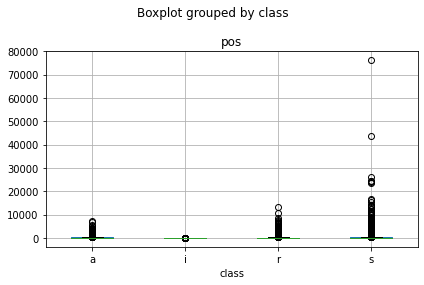

In [286]:
plt.figure(figsize=(25,25))
data.boxplot(column="pos",by="class")
plt.tight_layout()
plt.show()

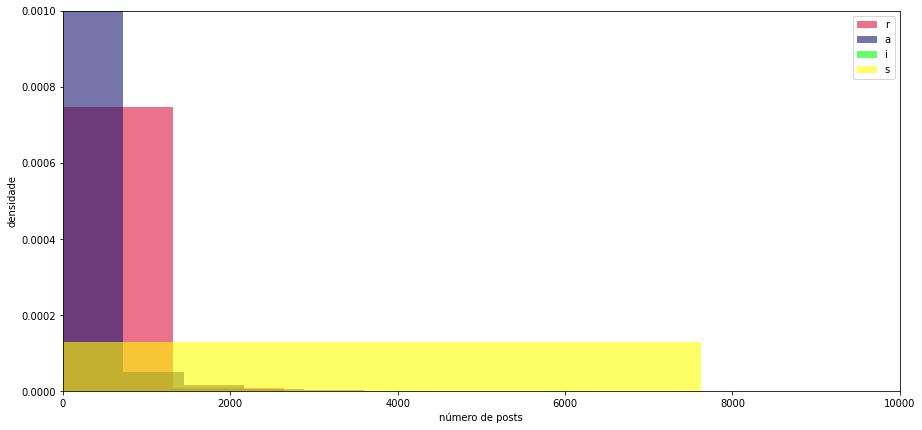

In [287]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['pos'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['pos'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['pos'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['pos'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlim(0,10000)
plt.ylim(0,0.001)
plt.xlabel('número de posts')
plt.ylabel('densidade')
plt.show()

Em relação a _feature_ posts (POS) muito pode-se concluir do histograma. Fica claro por contraste visual que usuários que possuem uma extrema quantidade de posts, com grande probabilidade serão classificados como _spam_; o que já era de se esperar do comportamento desse tipo de usuário de Instagram. Outro ponto de muito destaque, é a concentração de usuários inativos na área que representa uma quantidade baixíssima de poasts; comportamento também esperado por esse tipo de usuário.

+ #### Relação entre Class e Número de seguidores	

<Figure size 1800x1800 with 0 Axes>

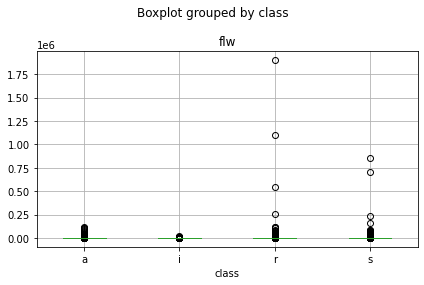

In [288]:
plt.figure(figsize=(25,25))
data.boxplot(column="flw",by="class")
plt.tight_layout()
plt.show()

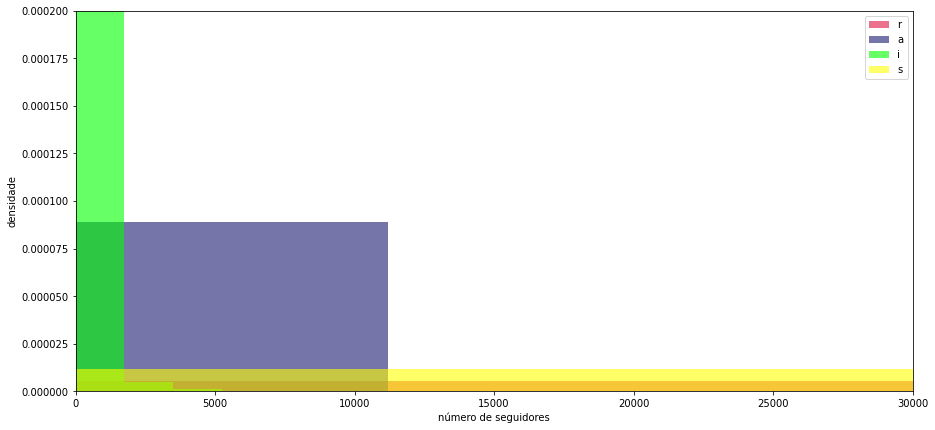

In [289]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['flw'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['flw'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['flw'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['flw'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlim(0,30000)
plt.ylim(0,0.0002)
plt.xlabel('número de seguidores')
plt.ylabel('densidade')
plt.show()

Em relação a _feature_ número de seguidores (FLW) verifica-se que tanto os usuários spam quanto os reais apresentam um comportamento similar, o que pode apresentar uma complicação na hora de classificar futuramente demais usuários. Apesar disso, verifica-se comportamentos distintos para usuários inativos e ativos fake; comportamentos esperados dada as características de atividade desses usuários.

+ #### Relação entre Class e Número contas seguindo

<Figure size 1800x1800 with 0 Axes>

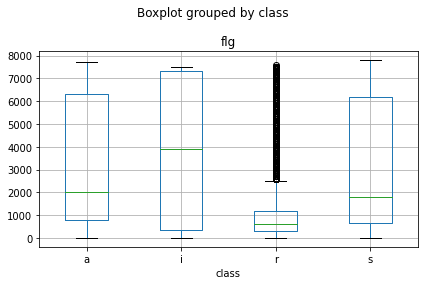

In [290]:
plt.figure(figsize=(25,25))
data.boxplot(column="flg",by="class")
plt.tight_layout()
plt.show()

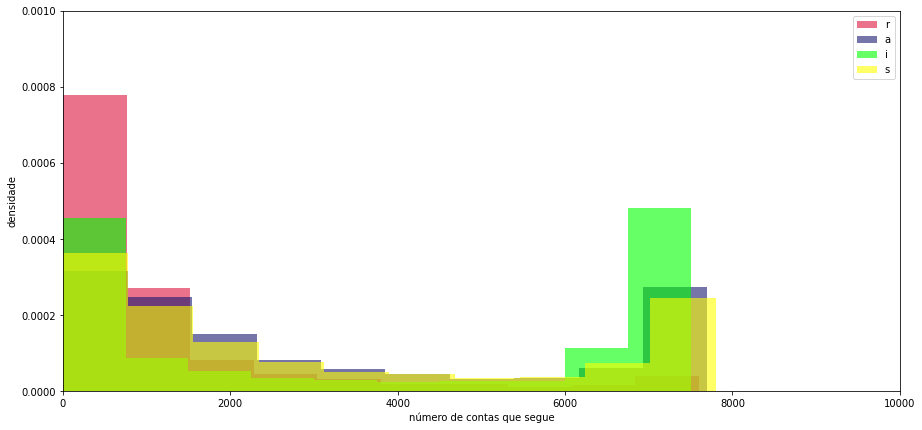

In [291]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['flg'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['flg'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['flg'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['flg'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlim(0,10000)
plt.ylim(0,0.001)
plt.xlabel('número de contas que segue')
plt.ylabel('densidade')
plt.show()

Analisando o primeiro gráfico a respeito da _feature_ número de contas seguindo (FLG) percebe-se que as medianas (representadas pela linha horizontal verde) são diferentes para cada uma das classificações. Isso leva a concluir que a faixa de número de seguidores em que uma conta de Instagram se classificar será importante para a classificação final de tipo de usuário.

+ #### Relação Class e Tamanho da Biografia	

<Figure size 1800x1800 with 0 Axes>

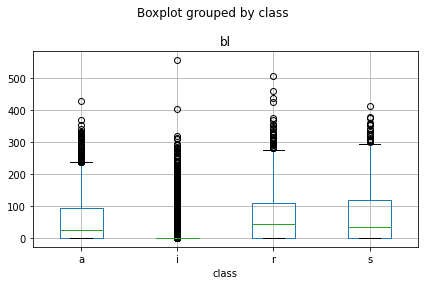

In [292]:
plt.figure(figsize=(25,25))
data.boxplot(column="bl",by="class")
plt.tight_layout()
plt.show()

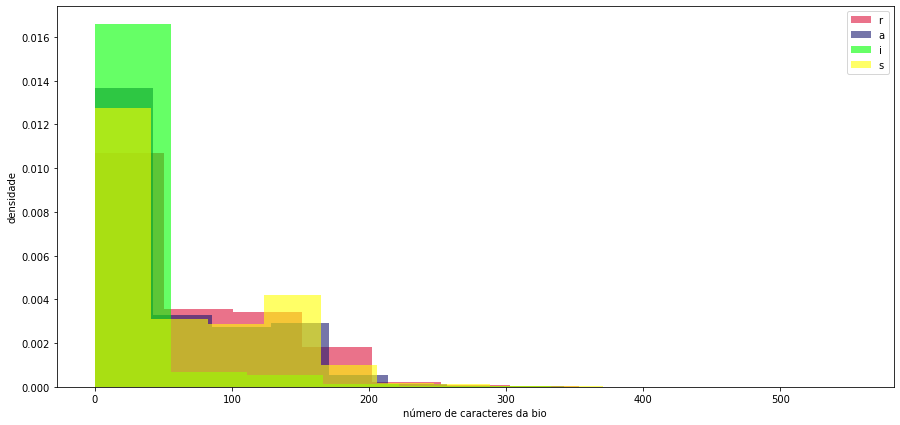

In [293]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['bl'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['bl'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['bl'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['bl'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlabel('número de caracteres da bio')
plt.ylabel('densidade')
plt.show()

A _feature_ tamanho da biografia (BL) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Disponibilidade de Foto	

In [294]:
perfis_sem_foto = data.loc[data['pic']== 0]
perfis_com_foto = data.loc[data['pic']== 1]

perfis_reais_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='r']
perfis_fake_ativo_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='a']
perfis_fake_inativo_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='i']
perfis_fake_spam_com_foto = perfis_com_foto.loc[perfis_com_foto['class']=='s']

perfis_reais_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='r']
perfis_fake_ativo_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='a']
perfis_fake_inativo_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='i']
perfis_fake_spam_sem_foto = perfis_sem_foto.loc[perfis_sem_foto['class']=='s']

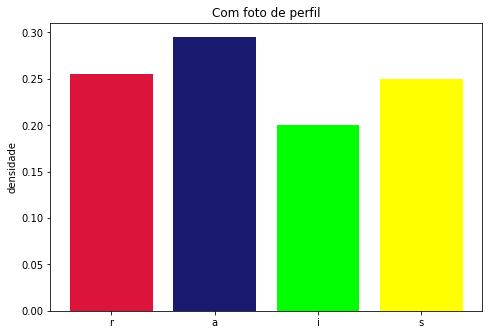

In [295]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_ativo_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_inativo_com_foto.shape[0]/perfis_com_foto.shape[0], perfis_fake_spam_com_foto.shape[0]/perfis_com_foto.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Com foto de perfil')
plt.ylabel('densidade')
plt.show()

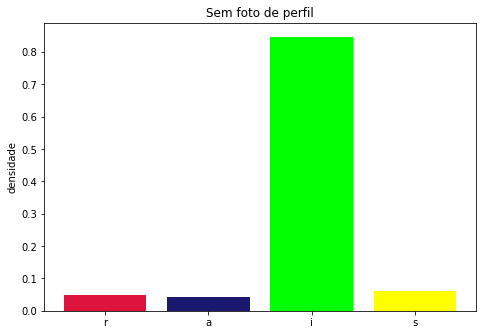

In [296]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_ativo_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_inativo_sem_foto.shape[0]/perfis_sem_foto.shape[0], perfis_fake_spam_sem_foto.shape[0]/perfis_sem_foto.shape[0]]
ax.bar(perfis,quantidade,color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Sem foto de perfil')
plt.ylabel('densidade')
plt.show()

A partir dos graficos, conclui-se que perfis sem disponibilidade de fotos tendem a serem classificados como fakes inativos,comportamento esperado já que fakes inativos." é uma classificação refetente a usuários que estão com a conta parada.Enquanto perfis com disponibilidade de fotos variam entre perfis de usuários ativos, fakes ativos e spam.

+ #### Relação Class e Disponibilidade de Link	

In [297]:
perfis_sem_link = data.loc[data['pic']== 0]
perfis_com_link= data.loc[data['pic']== 1]

perfis_reais_com_link = perfis_com_link.loc[perfis_com_link['class']=='r']
perfis_fake_ativo_com_link = perfis_com_link.loc[perfis_com_link['class']=='a']
perfis_fake_inativo_com_link = perfis_com_link.loc[perfis_com_link['class']=='i']
perfis_fake_spam_com_link = perfis_com_link.loc[perfis_com_link['class']=='s']

perfis_reais_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='r']
perfis_fake_ativo_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='a']
perfis_fake_inativo_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='i']
perfis_fake_spam_sem_link = perfis_sem_link.loc[perfis_sem_link['class']=='s']

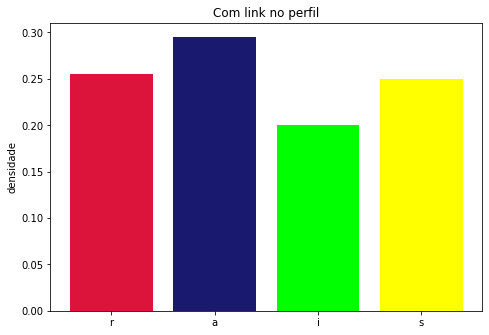

In [298]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_ativo_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_inativo_com_link.shape[0]/perfis_com_link.shape[0], perfis_fake_spam_com_link.shape[0]/perfis_com_link.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Com link no perfil')
plt.ylabel('densidade')
plt.show()

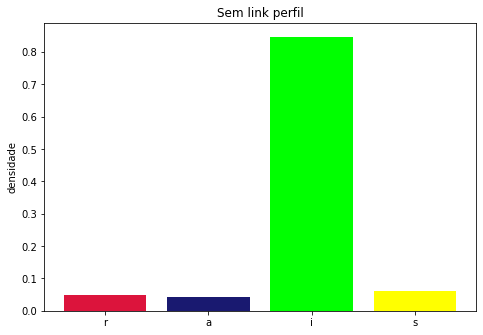

In [299]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
perfis = ['r', 'a', 'i', 's']
quantidade = [perfis_reais_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_ativo_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_inativo_sem_link.shape[0]/perfis_sem_link.shape[0], perfis_fake_spam_sem_link.shape[0]/perfis_sem_link.shape[0]]
ax.bar(perfis,quantidade, color=['crimson', 'midnightblue', 'lime', 'yellow'])
plt.title('Sem link perfil')
plt.ylabel('densidade')
plt.show()

A partir dos gráficos, nota-se que perfis que não possuem links tendem a estarem associados a perfis de fakes inativos, comportamento esperado pela característica da classificação de serem contas não mais acessadas. Enquanto perfis que possuem links tendem a estarem associados a usuários fakes ativos, spam e usuários reais (majoritariamente).


+ #### Relação Class e Tamanho médio da Legenda	

<Figure size 1800x1800 with 0 Axes>

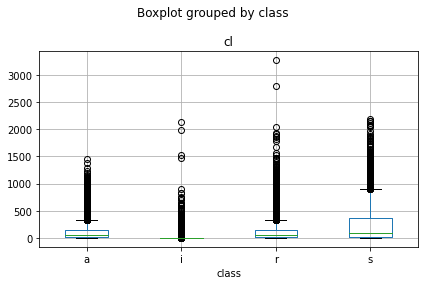

In [300]:
plt.figure(figsize=(25,25))
data.boxplot(column="cl",by="class")
plt.tight_layout()
plt.show()

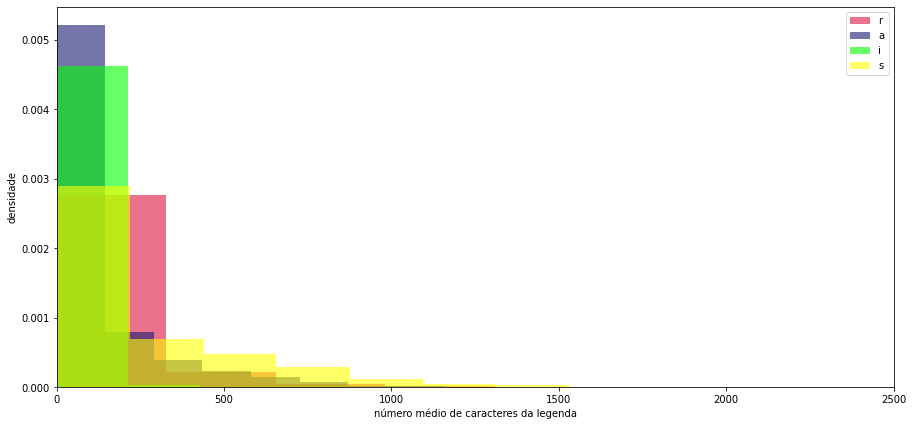

In [301]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['cl'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['cl'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['cl'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['cl'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,2500)
plt.xlabel('número médio de caracteres da legenda')
plt.ylabel('densidade')

plt.show()

A partir do gráfico, conclui-se que todas as classificações possuem um número médio de caracteres próximo, porém a classificação spam tende a ter um número de caracteres mais alto, comportamento que se justifica na caractéristica de usuários "spam" ligada a propagação de informação em massa.

+ #### Relação Class e Legenda Zero	

<Figure size 1800x1800 with 0 Axes>

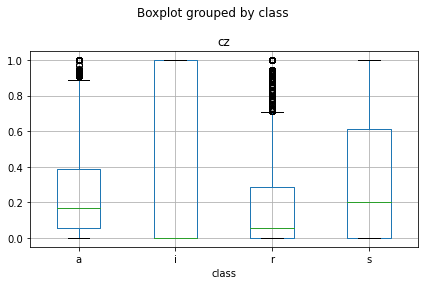

In [302]:
plt.figure(figsize=(25,25))
data.boxplot(column="cz",by="class")
plt.tight_layout()
plt.show()

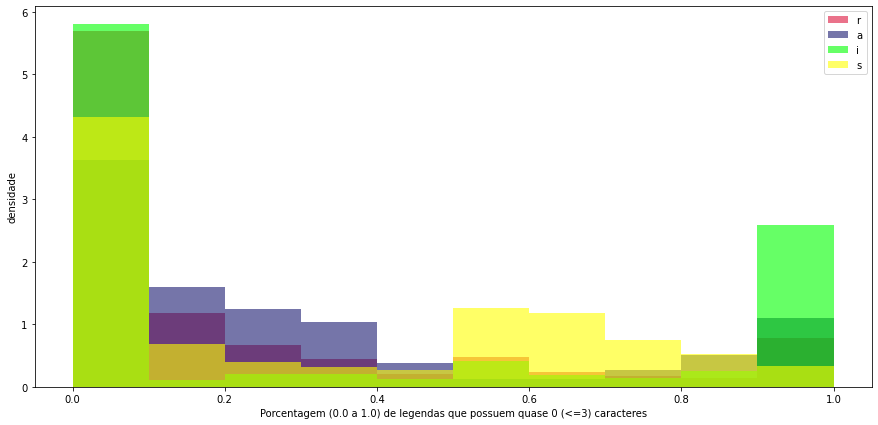

In [303]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['cz'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['cz'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['cz'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['cz'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlabel('Porcentagem (0.0 a 1.0) de legendas que possuem quase 0 (<=3) caracteres')
plt.ylabel('densidade')
plt.show()

A partir do gráfico, conclui-se que usuários ativos tendem a ter menos legenda zero, devido a atividade do usuário na rede  característica de sua classificação, entretanto, podemos observar sua presença nos extremos próximos de 1 da legenda zero, correpondente a "outliers". Ainda, observa-se que a mediana de usuários reais indica a alta presença de legendas (exceto por pontos outliers concentrados próximos a 1). Por fim, usuários spam possuem a maior mediana, ou seja, tendem mais a não ter legenda e usuários inativos encontram-se distribuídos ao longo do parâmetro, ou seja, não é uma feature que ajude a determinar este tipo de classificação.

+ #### Relação Class e Porcentagem Sem Imagem

<Figure size 1800x1800 with 0 Axes>

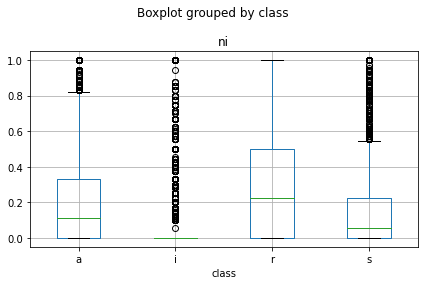

In [304]:
plt.figure(figsize=(25,25))
data.boxplot(column="ni",by="class")
plt.tight_layout()
plt.show()

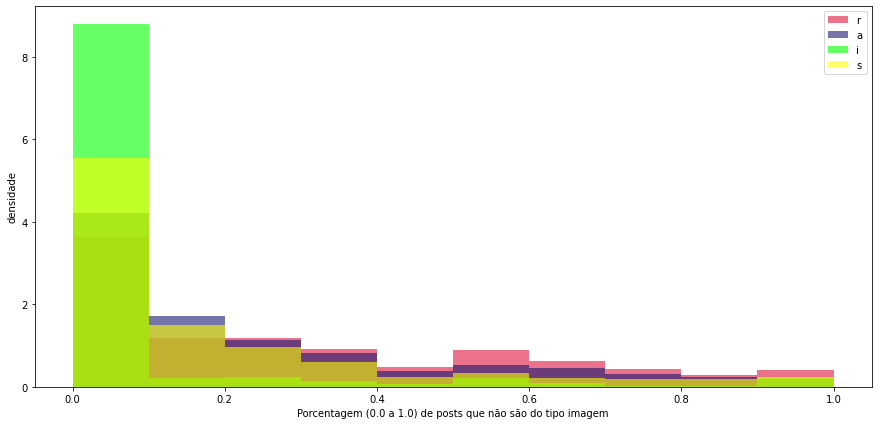

In [305]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['ni'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['ni'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['ni'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['ni'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlabel('Porcentagem (0.0 a 1.0) de posts que não são do tipo imagem')
plt.ylabel('densidade')
plt.show()

Analisando o primeiro gráfico e o histograma a respeito da _feature_ de porcentagem de posts que não são tipo imagem (NI) percebe-se que essa variável tem comportamento semelhante para todos os tipos de perfil, no entanto perfis fakes inativos tem uma característica discrepante que é uma mediana igual a 0.

+ #### Relação Class e Taxa de Engajamento (Like)	

<Figure size 1800x1800 with 0 Axes>

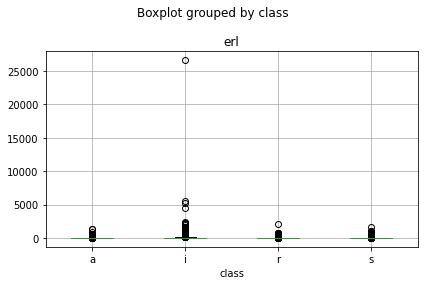

In [306]:
plt.figure(figsize=(25,25))
data.boxplot(column="erl",by="class")
plt.tight_layout()
plt.show()

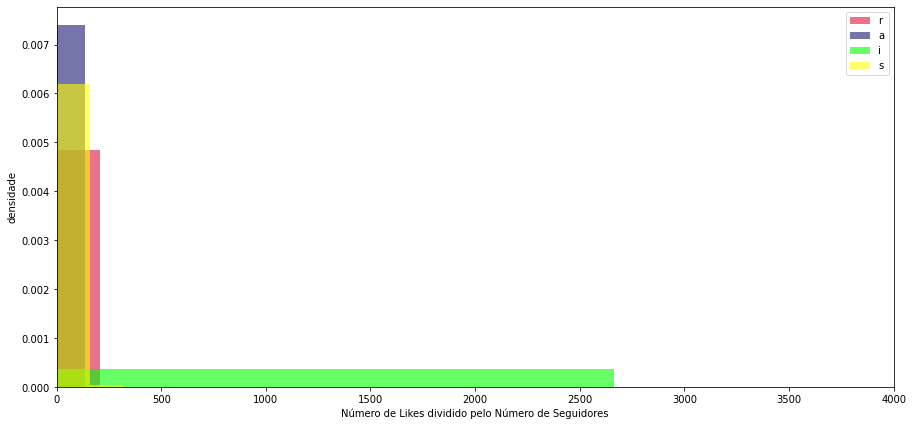

In [307]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['erl'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['erl'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['erl'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['erl'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])
plt.xlim(0,4000)
plt.xlabel('Número de Likes dividido pelo Número de Seguidores')
plt.ylabel('densidade')
plt.show()

A _feature_ Taxa de Engajamento em Likes (ERL) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Taxa de Engajamento (Comentário)	

<Figure size 1800x1800 with 0 Axes>

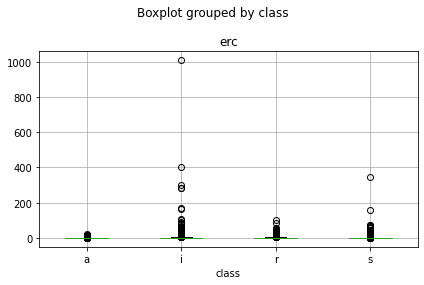

In [308]:
plt.figure(figsize=(25,25))
data.boxplot(column="erc",by="class")
plt.tight_layout()
plt.show()

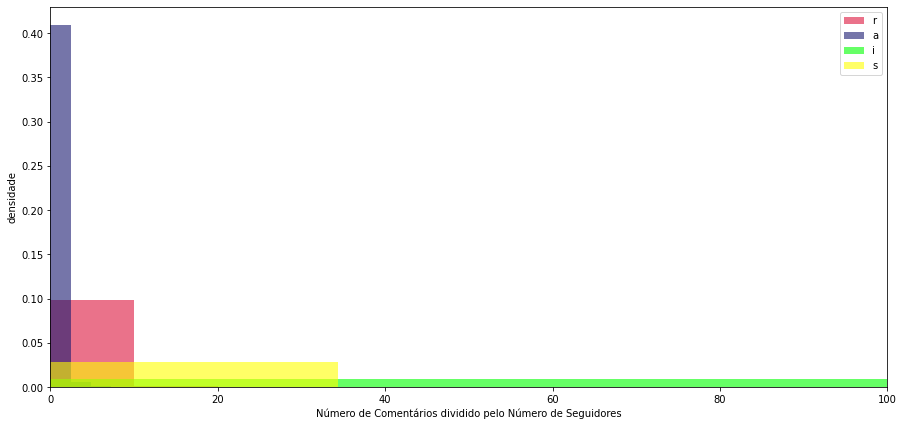

In [309]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['erc'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['erc'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['erc'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['erc'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,100)
plt.xlabel('Número de Comentários dividido pelo Número de Seguidores')
plt.ylabel('densidade')
plt.show()

A _feature_ Taxa de Engajamento em Comentários (ERC) não parece ser um elemento decisivo na classificação, dada a proximidade de suas medianas observadas no primeiro gráfico. Apesar disso, observando o histograma fica claro que há certa diferença de concentração entre as classificações, porém nada muito decisivo por se tratarem de _outliers_.

+ #### Relação Class e Porcentagem de Localização

<Figure size 1800x1800 with 0 Axes>

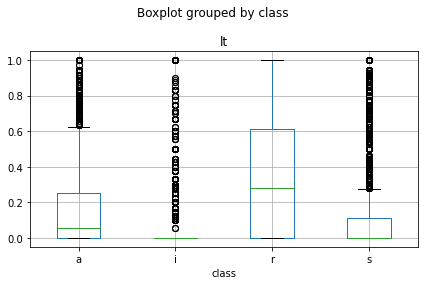

In [310]:
plt.figure(figsize=(25,25))
data.boxplot(column="lt",by="class")
plt.tight_layout()
plt.show()

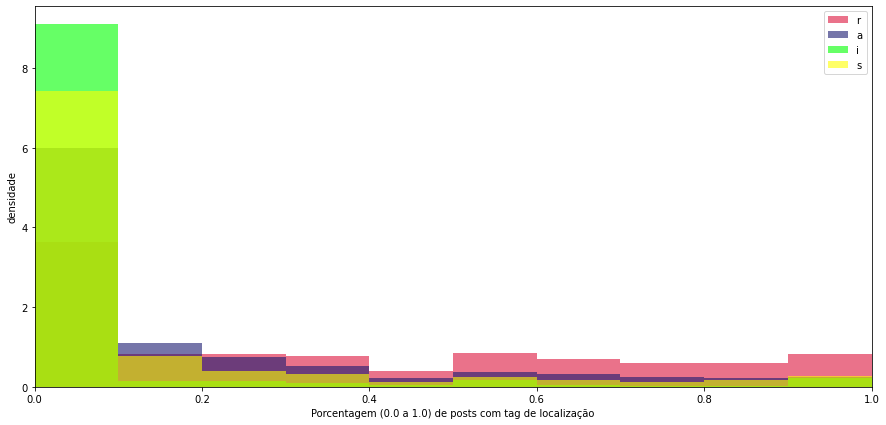

In [311]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['lt'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['lt'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['lt'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['lt'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,1)
plt.xlabel('Porcentagem (0.0 a 1.0) de posts com tag de localização')
plt.ylabel('densidade')
plt.show()

A _feature_ Porcentagem de Localização (LT) parece ser um elemento decisivo na classificação, dado que a mediana observada no primeiro gráfico dos perfis reais é significativamente maior do que os perfis fakes. Observa-se também que as medianas dos perfis fakes inativos e spams são iguais a 0%.

+ #### Relação Class e Média de uso de Hashtags	

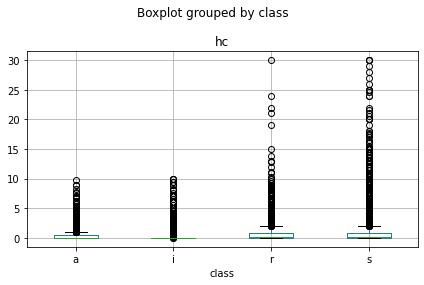

In [312]:
data.boxplot(column="hc",by="class")
plt.tight_layout()
plt.show()

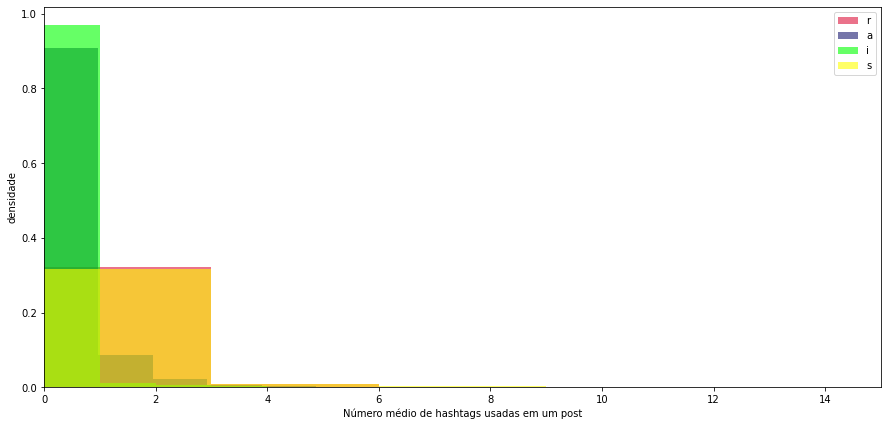

In [313]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['hc'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['hc'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['hc'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['hc'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,15)
plt.xlabel('Número médio de hashtags usadas em um post')
plt.ylabel('densidade')
plt.show()

Sobre a média de uso de hashtags (HC) o primeiro gráfico indicam que há uma grande quantidade de _outiliers_ em todas as classificações. Talvez porque o uso ou não desse símbolo parta de uma decisão mais pessoal do usuário. Apesar disso vale destacar que pelo histograma observa-se um maior uso de hashtags pelas contas spam.

+ #### Relação Class e Palavras-Chave Promocionais

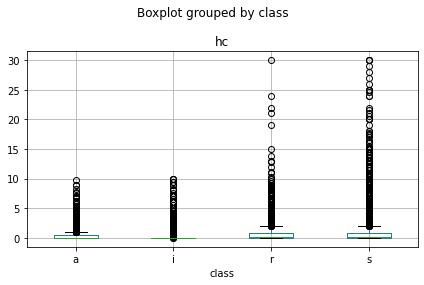

In [314]:
data.boxplot(column="hc",by="class")
plt.tight_layout()
plt.show()

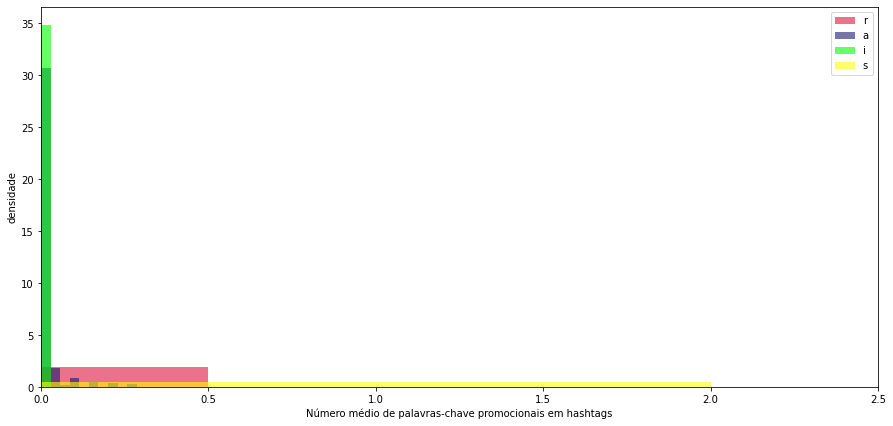

In [315]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['pr'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['pr'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['pr'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['pr'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,2.5)
plt.xlabel('Número médio de palavras-chave promocionais em hashtags')
plt.ylabel('densidade')
plt.show()

Sobre a _feature_ palavras-chave promocionais (HC) percebe-se pelo histograma que a grande maioria ocorre em contas spam; comportamento esperado por esse tipo de usuário. Além disso, vale distacar a quantidade de _outiliers_ nessa _feature_ verificada visualmente pelo primeiro gráfico; a coluna de pontos indica uma grande dispersão variada, o que talvez indique que essa variável não seja tão decisiva no momento da classificação.

+ #### Relação Class e Palavras-Chave Seguidores

<Figure size 1800x1800 with 0 Axes>

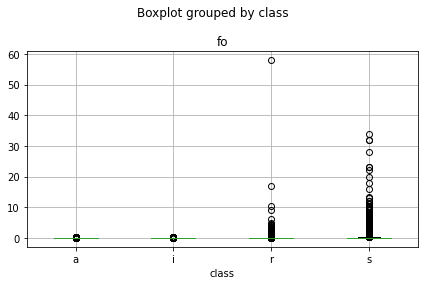

In [316]:
plt.figure(figsize=(25,25))
data.boxplot(column="fo",by="class")
plt.tight_layout()
plt.show()

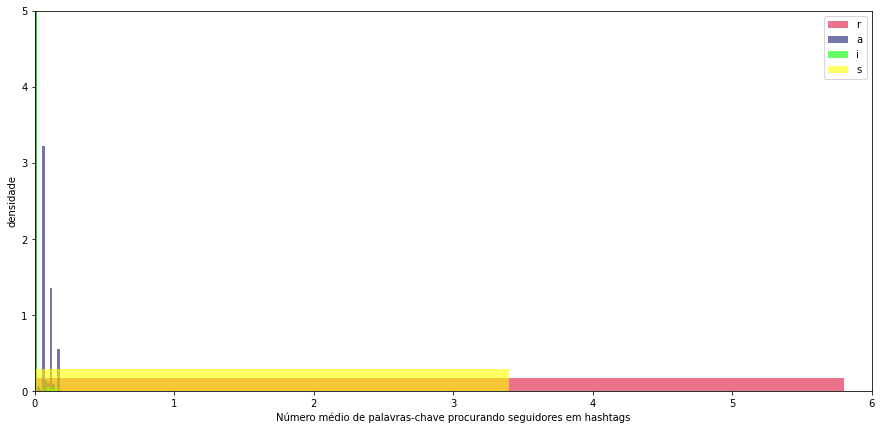

In [317]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['fo'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['fo'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['fo'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['fo'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,6)
plt.ylim(0,5)
plt.xlabel('Número médio de palavras-chave procurando seguidores em hashtags')
plt.ylabel('densidade')
plt.show()

Em relação à _feature_ palavras-chave seguidores (FO) percebe-se pelo histograma maior ocorrência em perfis ativos, abrangindo-se também para spams. Esse elemento também pode ser considerado uma importante _featrure_ para classificação visto que a rpocura por seguidores em rede sociais pode dizer muito sobre o estado de um usuário.

+ #### Relação Class e Similaridade por Cosseno

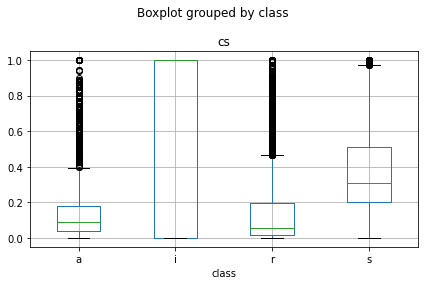

In [318]:
data.boxplot(column="cs",by="class")
plt.tight_layout()
plt.show()

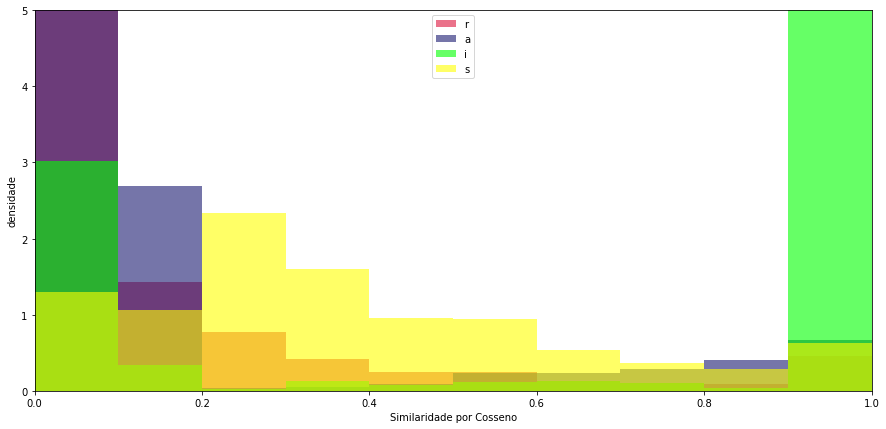

In [319]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['cs'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['cs'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['cs'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['cs'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('Similaridade por Cosseno')
plt.ylabel('densidade')
plt.show()

+ #### Relação Class e Intervalo de Posts

<Figure size 1800x1800 with 0 Axes>

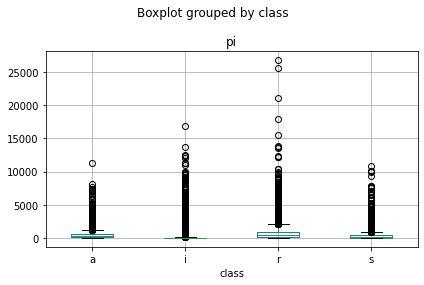

In [320]:
plt.figure(figsize=(25,25))
data.boxplot(column="pi",by="class")
plt.tight_layout()
plt.show()

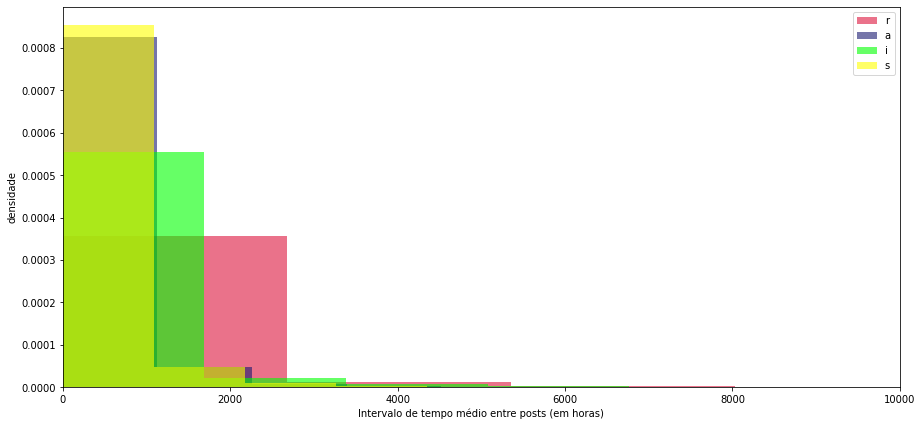

In [321]:
fig = plt.figure(figsize=(15, 7))
perfis_reais['pi'].plot.hist(color=('crimson'), alpha=0.6, density=True)
perfis_fake_ativo['pi'].plot.hist(color=('midnightblue'), alpha=0.6, density=True)
perfis_fake_inativo['pi'].plot.hist(color=('lime'), alpha=0.6, density=True)
perfis_fake_spam['pi'].plot.hist(color=('yellow'), alpha=0.6, density=True)
plt.legend(['r', 'a', 'i', 's'])

plt.xlim(0,10000)
plt.xlabel('Intervalo de tempo médio entre posts (em horas)')
plt.ylabel('densidade')
plt.show()

Observando o histograma fica muito claro o comportamento dos usuários spam em relação ao intervalo entre posts (PI) quando comparado com os outros. Em paralelo, o usuário spam possui um intervalo de tempo entre publicações significament menores; um comportamento esperado desse tipo de usuário. Outro comportamento comprovado pelo histograma que também já era esperado é o longo intervalo entre posots por parte dos usuários inativos.

## C. Modelos de Predição 


## Preparação do Dataset

In [322]:
dataToTree = pd.read_csv('user_fake_authentic_4class.csv')

#Transformando os dados em um formato que a árvore de decisão possa entender (numérico)
labelencoder = LabelEncoder()
dataToTree['class'] = labelencoder.fit_transform(dataToTree['class'])
dataToTree['class'].value_counts()

# a -> 0, i -> 1, r -> 2, s -> 3

0    12054
1    10549
2    10441
3    10263
Name: class, dtype: int64

In [323]:
#Features 
x = dataToTree.drop("class", axis=1)
#Target
y = dataToTree["class"]

#Divisão do dataset em treino e teste 
Xtrain, Xval, Ytrain, Yval = train_test_split(x, y, test_size=0.5, random_state=0)

## Decision Tree

A aprendizagem baseada em árvores de decisão é uma das abordagens de modelagem preditiva mais usadas em estatística e machine learning. Ela usa uma árvore de decisão como modelo preditivo para, a partir de observações sobre um item (representadas nos galhos) chegar em conclusões sobre o valor de uma variável target (representada nas folhas). O modelo funciona construindo um procedimento de perguntas de sim ou não a partir de certas características (features), para obter o target, que pode ser categórico ou numérico. Escolhemos essa abordagem por conta da simplicidade de sua implementação e de sua eficácia na predição de targets categóricos.
  


#### Como interpretar uma árvore como um modelo de predição  
Essa explicação foi baseada em um [artigo](#bibliografia) sobre o modelo de Decision Tree  

A estrutura de árvore pode ser entendida por meio dos conceitos de ramos, nós, sub-árvores e folhas, como na imagem abaixo:

<img src=img/exemplo_arvore.png>

Os círculos roxos são chamados de nós e as linhas pretas que os ligam, de ramos. Os nós que não tem descendentes (com borda laranja na imagem) são chamados de folhas e o primeiro nó (com borda verde) é chamado de raiz. Juntos, os nós e ramos formam uma árvore.
  
A raiz representa o dataset inteiro e cada ramo representa uma decisão. O número total de perguntas feitas nesse processo é chamado de profundidade (ou altura) dessa árvore. No caso da figura acima, temos uma árvore de profundidade 3: precisamos de 3 ramos (3 perguntas) para ir da raiz até as folhas.

#### Aplicação do modelo de Decision Tree ao nosso Dataset  
Escolhemos também uma profundidade de 3 ramos em nossa árvore:

In [324]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
decision_tree = decision_tree.fit(Xtrain, Ytrain)

## Random Forest

Essa explicação foi baseada em um [artigo](#bibliografia) sobre o modelo de Random Forest  
O método de Random Forest funciona basicamente de modo que ao invés de criar uma única árvore de decisão com todas as features ao mesmo tempo ele cria pequenas árvores de decisão a partir de algumas features aleatórias.  
No final, é feita uma "votação" a partir dos valores retornados por cada árvore, de forma que cada mini árvore toma uma decisão a partir dos dados apresentados. A decisão mais votada é a resposta do algoritmo.

<img src=img/exemplo_random.png>

Escolhemos essa abordagem por se tratar da evolução natural do método de Decision Tree aplicado anteriormente. Random Forests são populares por apresentarem bons resultados em diversos tipos de problema, tanto de regressão (ex.: prever valor de uma casa) quanto de classificação (e-mail é spam ou não é spam).

  

#### Aplicação do modelo de Random Forest ao nosso Dataset:

In [325]:
trees = RandomForestClassifier(n_estimators=1000,random_state=0, n_jobs=-1)
trees.fit(Xtrain, Ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

## D. Processo e Estatísticas de Validação

### Score
Pontuação de 0 a 1 referente a acurácia de classificação (função da biblioteca sklearn)

In [326]:
print('Score para o modelo de Decision Tree')
print(f'Score na base de treinamento: {decision_tree.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {decision_tree.score(Xval, Yval)}')
print('\n')
print('Score para o modelo de Random Forest')
print(f'Score na base de treinamento: {trees.score(Xtrain, Ytrain)}')
print(f'Score na base de teste: {trees.score(Xval, Yval)}')


Score para o modelo de Decision Tree
Score na base de treinamento: 0.7088625132776059
Score na base de teste: 0.7052276715618362


Score para o modelo de Random Forest
Score na base de treinamento: 1.0
Score na base de teste: 0.9044518333795142


### Matriz de Confusão

Essa explicação foi baseada em um [artigo](#bibliografia) sobre métricas de machine learning
Uma matriz de confusão é uma métrica voltada para modelos de classificação.  
Ela funciona como uma crosstab entre o valor previsto pelo modelo e o modelo real da base, permitindo calcular a quantidade de falso positivo e falso negativo; e de verdadeiro positivo e verdadeiro negativo, além de te fornecer a acurácia e sensibilidade. 
  
Quando o modelo prevê um caso positivo corretamente, nós temos um caso de Verdadeiro Positivo (True Positive - TP); caso o seu modelo diga que é uma classificação, quando na verdade não é, nós temos um caso de Falso Positivo (False Positive - FP), também conhecido como Type I Error.
  
O oposto também pode ocorrer. Quando o modelo diz que não é uma classificação, mas na verdade é, temos um caso de Falso Negativo (FN), também conhecido como Type II Error; e quando ele diz que não é uma classificação, e ele está certo, ocorre o Verdadeiro Negativo (TN).

## Métricas da Matriz de Confusão 

### Acurácia

Proporção de casos que foram corretamente previstos, sejam eles verdadeiro positivo ou verdadeiro negativo.  
Acurácia = (TP + TN) / (TP + TN + FP + FN)


In [327]:
def acuracia(matriz):
    acuracia = np.sum(np.diag(matriz)) / np.sum(matriz)
    return acuracia

### Sensibilidade / Recall

Proporção de casos positivos que foram identificados corretamente.  
Recall = TP / TP + FN

In [328]:
def recall(matriz):
    recall = np.diag(matriz) / np.sum(matriz, axis = 1)
    return recall   

### Precision

Proporção de casos positivos com casos que foram previstos como positivos.  
Precision = TP / TP + FP

In [329]:
def precision(matriz):
    precision = np.diag(matriz) / np.sum(matriz, axis = 0)
    return precision

## Aplicação da Matriz e Métricas

### Decision Tree

In [330]:
#Predição de valores pelo modelo de Decision Tree
Y_pred_decision = decision_tree.predict(Xval)
matriz_confusao_decision = confusion_matrix(Yval, Y_pred_decision)
print(matriz_confusao_decision)

[[4674    0 1381    0]
 [ 954 3537  797    0]
 [ 795   70 3473  865]
 [ 979  112  430 3587]]


In [331]:
fig = px.imshow(matriz_confusao_decision, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"), x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de Decision Tree')
fig.show()

In [332]:
acuracia_decision_tree =  acuracia(matriz_confusao_decision)
recall_decision_tree =  recall(matriz_confusao_decision)
precision_decision_tree =  precision(matriz_confusao_decision)

In [333]:
print(f'A acurácia do modelo de Decision Tree é {acuracia_decision_tree*100}%')
print('\n')
print(f'A recall do modelo de Decision Tree é:')
print(f'{recall_decision_tree[0]*100}% para as contas tipo "a"')
print(f'{recall_decision_tree[1]*100}% para as contas tipo "i"')
print(f'{recall_decision_tree[2]*100}% para as contas tipo "r"')
print(f'{recall_decision_tree[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de Decision Tree é:')
print(f'{precision_decision_tree[0]*100}% para as contas tipo "a"')
print(f'{precision_decision_tree[1]*100}% para as contas tipo "i"')
print(f'{precision_decision_tree[2]*100}% para as contas tipo "r"')
print(f'{precision_decision_tree[3]*100}% para as contas tipo "s"')


A acurácia do modelo de Decision Tree é 70.52276715618362%


A recall do modelo de Decision Tree é:
77.19240297274979% para as contas tipo "a"
66.88729198184569% para as contas tipo "i"
66.74995195079761% para as contas tipo "r"
70.22317932654659% para as contas tipo "s"


A precision do modelo de Decision Tree é:
63.14509592002162% para as contas tipo "a"
95.10621134713632% para as contas tipo "i"
57.11231705311627% para as contas tipo "r"
80.57053009883198% para as contas tipo "s"


### Random Forest

In [334]:
#Predição de valores pelo modelo de Random Forest
Y_pred_trees = trees.predict(Xval)
matriz_confusao_trees = confusion_matrix(Yval, Y_pred_trees)
print(matriz_confusao_trees)

[[5604    4  447    0]
 [   2 5000  285    1]
 [ 415  287 4055  446]
 [  12    6  164 4926]]


In [335]:
fig = px.imshow(matriz_confusao_trees, labels=dict(x="Y previsto", y="Y verdadeiro", color="Quantidade"),  x = ['a', 'i', 'r', 's'], y = ['a', 'i', 'r', 's'], title = 'Matriz de Confusão para o modelo de Random Forest')
fig.show()

In [336]:
acuracia_random_forest =  acuracia(matriz_confusao_trees)
recall_random_forest =  recall(matriz_confusao_trees)
precision_random_forest =  precision(matriz_confusao_trees)

In [337]:

print(f'A acurácia do modelo de Random Forest é {acuracia_random_forest*100}%')
print('\n')
print(f'A recall do modelo de Random Forest é:')
print(f'{recall_random_forest[0]*100}% para as contas tipo "a"')
print(f'{recall_random_forest[1]*100}% para as contas tipo "i"')
print(f'{recall_random_forest[2]*100}% para as contas tipo "r"')
print(f'{recall_random_forest[3]*100}% para as contas tipo "s"')
print('\n')
print(f'A precision do modelo de Random Forest é:')
print(f'{precision_random_forest[0]*100}% para as contas tipo "a"')
print(f'{precision_random_forest[1]*100}% para as contas tipo "i"')
print(f'{precision_random_forest[2]*100}% para as contas tipo "r"')
print(f'{precision_random_forest[3]*100}% para as contas tipo "s"')


A acurácia do modelo de Random Forest é 90.44518333795142%


A recall do modelo de Random Forest é:
92.55161023947151% para as contas tipo "a"
94.55370650529501% para as contas tipo "i"
77.935806265616% para as contas tipo "r"
96.43696162881754% para as contas tipo "s"


A precision do modelo de Random Forest é:
92.88910989557434% para as contas tipo "a"
94.39305267132339% para as contas tipo "i"
81.90264593011513% para as contas tipo "r"
91.68062534896706% para as contas tipo "s"


## Comparação de métricas

In [338]:
d2 = {'': ['Acurácia/Score', 'Sensibilidade/Recall para as classes:', 'a', 'i', 'r', 's','Precision para as classes:', 'a', 'i', 'r', 's'], 'Decision Tree': [acuracia_decision_tree, '', recall_decision_tree[0], recall_decision_tree[1], recall_decision_tree[2], recall_decision_tree[3], '', precision_decision_tree[0], precision_decision_tree[1], precision_decision_tree[2], precision_decision_tree[3]], 'Random Forest': [acuracia_random_forest, '', recall_random_forest[0], recall_random_forest[1], recall_random_forest[2], recall_random_forest[3], '', precision_random_forest[0], precision_random_forest[1], precision_random_forest[2], precision_random_forest[3]]}
df2 = pd.DataFrame(data=d2)
pd.set_option('display.max_colwidth', None)
df2.style.hide_index()

,Decision Tree,Random Forest
Acurácia/Score,0.705228,0.904452
Sensibilidade/Recall para as classes:,,
a,0.771924,0.925516
i,0.668873,0.945537
r,0.667500,0.779358
s,0.702232,0.964370
Precision para as classes:,,
a,0.631451,0.928891
i,0.951062,0.943931
r,0.571123,0.819026


## Cross Validation

In [339]:
##Fez o processo de Validação Cruzada, calculou a performance média e desvio padrão para treinamento e teste. Discutiu com riqueza de detalhes
# ! Não entendi o processo de performance média e desvio padrão 
#print(cross_val_score(decision_tree, Xval, Yval, cv = 10))  -> feito em aula
#! pesquisar sobre 10-fold cross validation
#! ou fazer como o projeto 1 de repitir o treinamento e teste várias vezes. Aí vc guarda em uma lista a acuracia e depois vê média e desvio padrão disso

## ROC e AUC

Receiver Operating Characteristics (ROC) e Area Under the Curve (AUC) são duas métricas muito utilizadas para modelos de classificação. O cálculo dessas métricas funcionam de forma muito semelhante a matriz de confusão. Você podê fazê-lo ao plotar a sensibilidade — a taxa de Verdadeiro Positivo — e (1-especificidade) — a taxa de Falso Positivo. Além disso, você deve passar mais um parâmetro, que podemos chamar de Threshold ou T parameter. Esse parâmetro pode ser imputado, onde geralmente é escolhido um valor de 0,5.  

<img src='img/roc.png'>  
  
Quanto mais alto e mais distante da linha diagonal a sua curva estiver, melhor. Caso fique difícil para diferenciarmos a curva ROC visualizando esse gráfico acima, nós podemos transformá-lo em um número único: esse número é a Area Under the Curve (Área Sob a Curva).
  
Area Under the ROC Curve é um número de 0 a 1 que mostra como seu modelo está performando ao utilizar como base para o cálculo a Taxa de Falso Positivo, a Taxa de Verdadeiro Positivo e o Threshold que você definiu, e interpretá-lo é fácil: quanto mais próximo de 1 esse número estiver, melhor.  
(Texto tirado do [artigo](https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b))

### Decision Tree

In [340]:
fprpred, tprpred, thresholds = roc_curve(Yval, Y_pred_decision, pos_label=2)
print(f'AUC do modelo de Random Forest: {auc(fprpred, tprpred)}')

AUC do modelo de Random Forest: 0.6547508344368596


### Random Forest

In [341]:
fprrand, tprrand, thresholds = roc_curve(Yval, Y_pred_trees, pos_label=2)
print(f'AUC do modelo de Random Forest: {auc(fprrand, tprrand)}')

AUC do modelo de Random Forest: 0.638459330466975


## E. Conclusão  
    Faça conclusão final com detalhes levando em consideração todas as
    interpretações realizadas no decorrer do projeto.

## F. Referências Bibliográficas    

<div id="bibliografia"></div>  

- [Modelos de Predição | Decision Tree](https://medium.com/turing-talks/turing-talks-17-modelos-de-predição-decision-tree-610aa484cb05)
- [Random Forest: como funciona um dos algoritmos mais populares de ML](https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4)
- [Como saber se seu modelo de Machine Learning está funcionando mesmo](https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b)